<a href="https://colab.research.google.com/github/Acelhaka/AIFinalProject/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer DataSet
**Predicting if the cancer cells are benign = 0 or malignant = 1**

Attribute Information:

1) ID number 
2) Diagnosis (1 = malignant , 0 = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



---Importing the open source AI library (TensorFlow)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns # data visualization library 
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


---Importing the file with the data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving breastCancerData.csv to breastCancerData.csv


---Skipping the first row that contains the header of each column

---To suspress scientific notations used: np.set_printoptions(suppress=True)

In [0]:
np.set_printoptions(suppress=True) #to suspress scientific notations
xy = np.loadtxt('breastCancerData.csv', skiprows = 1, delimiter = ",")

In [0]:
print(xy.shape)


(569, 32)


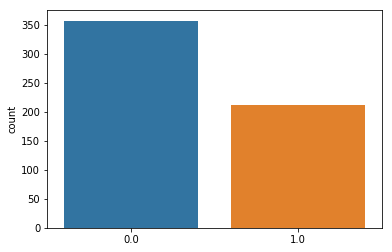

In [0]:
import plotly.graph_objs as go
output = xy[:, 1]

ax = sns.countplot(output, label="Count")     

#Blue = Benign = 357
#Yellow = Malignant = 212


---printing 5 rows to check the dataset

1- First column is the ID 
2 - Second column is the dependent varaible (Y)



In [0]:
print(xy[0:5, :])

[[  842302.              1.             17.99           10.38
       122.8          1001.              0.1184          0.2776
         0.3001          0.1471          0.2419          0.07871
         1.095           0.9053          8.589         153.4
         0.006399        0.04904         0.05373         0.01587
         0.03003         0.006193       25.38           17.33
       184.6          2019.              0.1622          0.6656
         0.7119          0.2654          0.4601          0.1189  ]
 [  842517.              1.             20.57           17.77
       132.9          1326.              0.08474         0.07864
         0.0869          0.07017         0.1812          0.05667
         0.5435          0.7339          3.398          74.08
         0.005225        0.01308         0.0186          0.0134
         0.01389         0.003532       24.99           23.41
       158.8          1956.              0.1238          0.1866
         0.2416          0.186           0.275

## Create a boxplot
To check for each feature the outliers and the mean.

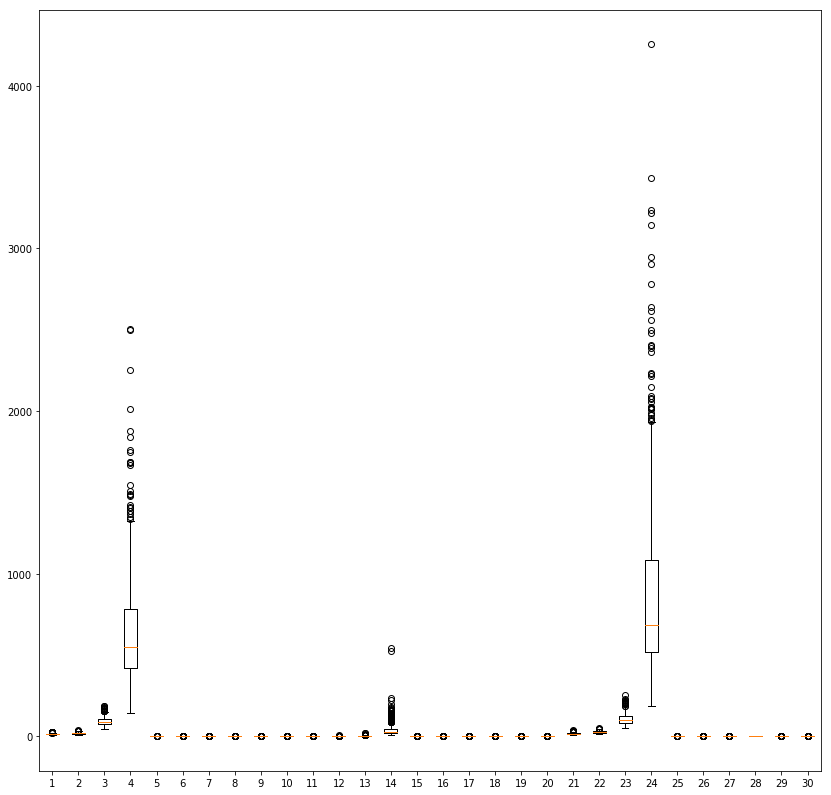

In [0]:
# Create a figure instance
fig = plt.figure(1, figsize=(14, 14))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(xy[:, 2:32])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

## Splitingt the data into Training data and Test data

Before splitting the data into training data set and testing data set, checked if it is necessary to shuffle the dataset(rows). Rows seem to already be a good mixture of 1 = Malignant and 0 = Belign (output column), not necessary to shuffle.

In [0]:
#spliting the data into 400 first rows for the train data set
#the last 169 rows are split into the test data set
xy_train = xy[0:400, :]
xy_test  = xy[400:, :]
print('Train data')
print(xy_train[0:5])
print('Test data')
print(xy_test[0:5])

Train data
[[  842302.              1.             17.99           10.38
       122.8          1001.              0.1184          0.2776
         0.3001          0.1471          0.2419          0.07871
         1.095           0.9053          8.589         153.4
         0.006399        0.04904         0.05373         0.01587
         0.03003         0.006193       25.38           17.33
       184.6          2019.              0.1622          0.6656
         0.7119          0.2654          0.4601          0.1189  ]
 [  842517.              1.             20.57           17.77
       132.9          1326.              0.08474         0.07864
         0.0869          0.07017         0.1812          0.05667
         0.5435          0.7339          3.398          74.08
         0.005225        0.01308         0.0186          0.0134
         0.01389         0.003532       24.99           23.41
       158.8          1956.              0.1238          0.1866
         0.2416          0.186     

Printing train and test data set dimensions

In [0]:
print(xy_train.shape)
print(xy_test.shape)

(400, 32)
(169, 32)


## **Checking the correlation of each input feature with the output**

Checking the correlation of the first feature (radius_mean[col2]) with diagnosis [col1]

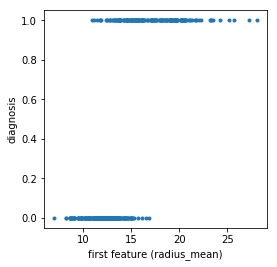

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 2], xy_train[:, 1], '.')
plt.xlabel('first feature (radius_mean)')
plt.ylabel('diagnosis')
plt.show()

Analysis: Bigger radius of the cells correlates to higher chances of a Malignant cancer

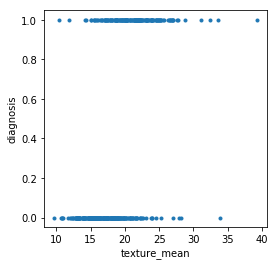

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 3], xy_train[:, 1], '.')
plt.xlabel('texture_mean')
plt.ylabel('diagnosis')
plt.show()

Analysis: Texture_mean is correlated with diagnosis, M or B but not with the same correlation as radius mean

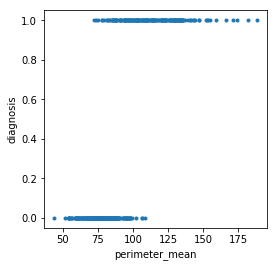

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 4], xy_train[:, 1], '.')
plt.xlabel('perimeter_mean')
plt.ylabel('diagnosis')
plt.show()

Analysis: higher values of perimeter mean higher chances of the cell to be Malignant, however between a perimeter mean of 75-100 we cannot easily determine what type of cell is.

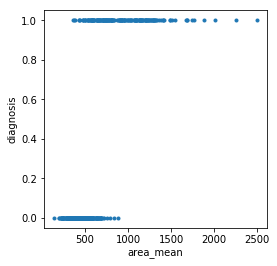

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 5], xy_train[:, 1], '.')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()

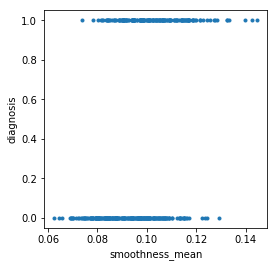

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 6], xy_train[:, 1], '.')
plt.xlabel('smoothness_mean')
plt.ylabel('diagnosis')
plt.show()

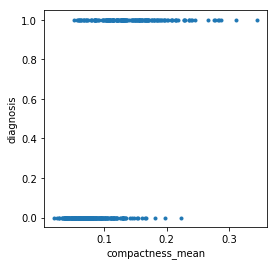

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 7], xy_train[:, 1], '.')
plt.xlabel('compactness_mean')
plt.ylabel('diagnosis')
plt.show()

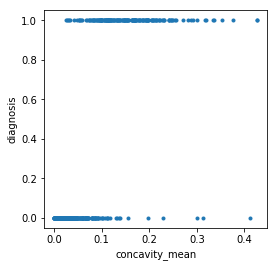

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 8], xy_train[:, 1], '.')
plt.xlabel('concavity_mean')
plt.ylabel('diagnosis')
plt.show()

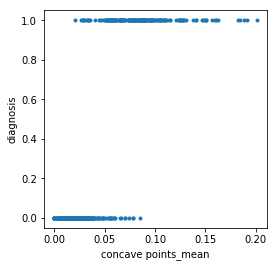

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 9], xy_train[:, 1], '.')
plt.xlabel('concave points_mean')
plt.ylabel('diagnosis')
plt.show()

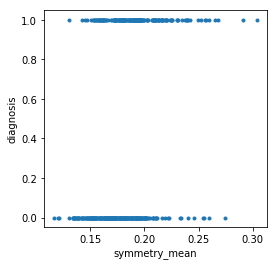

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 10], xy_train[:, 1], '.')
plt.xlabel('symmetry_mean')
plt.ylabel('diagnosis')
plt.show()

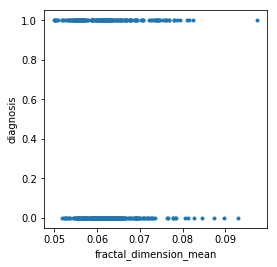

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 11], xy_train[:, 1], '.')
plt.xlabel('fractal_dimension_mean')
plt.ylabel('diagnosis')
plt.show()

Explanation: Fractal dimension is a measure of how "complicated" a self-similar figure is. In a rough sense, it measures "how many points" lie in a given set. 
https://www.youtube.com/watch?v=gB9n2gHsHN4

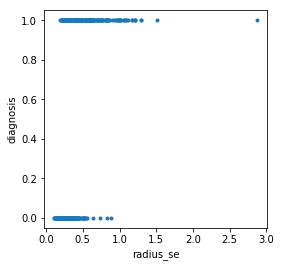

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 12], xy_train[:, 1], '.')
plt.xlabel('radius_se')
plt.ylabel('diagnosis')
plt.show()

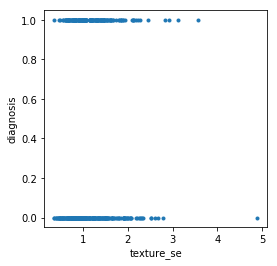

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 13], xy_train[:, 1], '.')
plt.xlabel('texture_se')
plt.ylabel('diagnosis')
plt.show()

Analysis: Texture standard error feature, does not help in our predictions, since if it varies from 0-3 it can be both a Malign ant or Benign cell.

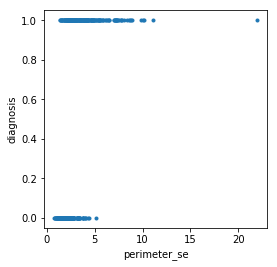

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 14], xy_train[:, 1], '.')
plt.xlabel('perimeter_se')
plt.ylabel('diagnosis')
plt.show()

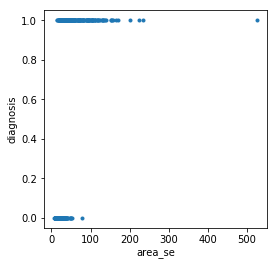

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 15], xy_train[:, 1], '.')
plt.xlabel('area_se')
plt.ylabel('diagnosis')
plt.show()

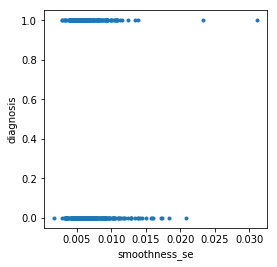

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 16], xy_train[:, 1], '.')
plt.xlabel('smoothness_se')
plt.ylabel('diagnosis')
plt.show()

Analysis: Same conclusion as texture_se we can attain for smoothness_se, it will not have an impactfull weight on our prediction

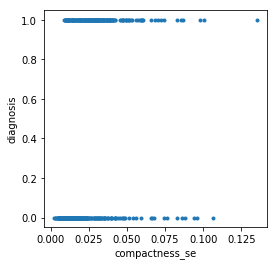

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 17], xy_train[:, 1], '.')
plt.xlabel('compactness_se')
plt.ylabel('diagnosis')
plt.show()

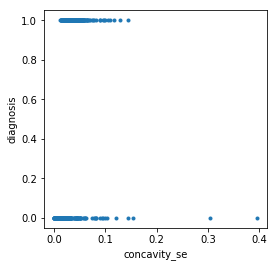

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 18], xy_train[:, 1], '.')
plt.xlabel('concavity_se')
plt.ylabel('diagnosis')
plt.show()

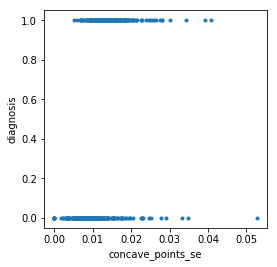

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 19], xy_train[:, 1], '.')
plt.xlabel('concave_points_se')
plt.ylabel('diagnosis')
plt.show()

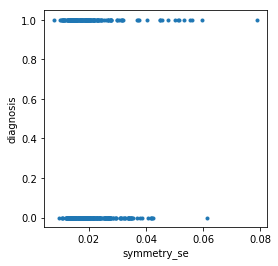

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 20], xy_train[:, 1], '.')
plt.xlabel('symmetry_se')
plt.ylabel('diagnosis')
plt.show()

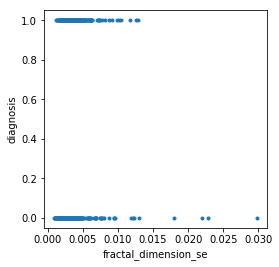

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 21], xy_train[:, 1], '.')
plt.xlabel('fractal_dimension_se')
plt.ylabel('diagnosis')
plt.show()

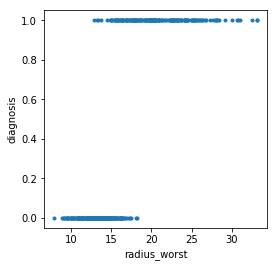

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 22], xy_train[:, 1], '.')
plt.xlabel('radius_worst')
plt.ylabel('diagnosis')
plt.show()

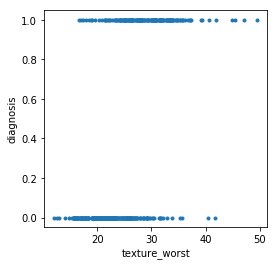

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 23], xy_train[:, 1], '.')
plt.xlabel('texture_worst')
plt.ylabel('diagnosis')
plt.show()

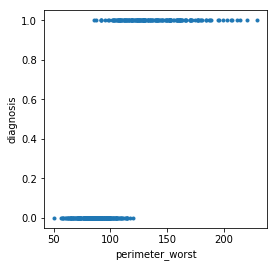

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 24], xy_train[:, 1], '.')
plt.xlabel('perimeter_worst')
plt.ylabel('diagnosis')
plt.show()

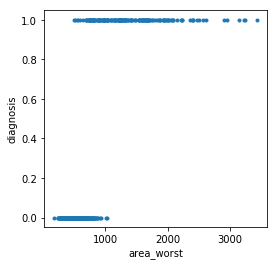

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 25], xy_train[:, 1], '.')
plt.xlabel('area_worst')
plt.ylabel('diagnosis')
plt.show()

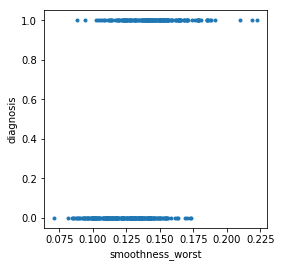

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 26], xy_train[:, 1], '.')
plt.xlabel('smoothness_worst')
plt.ylabel('diagnosis')
plt.show()

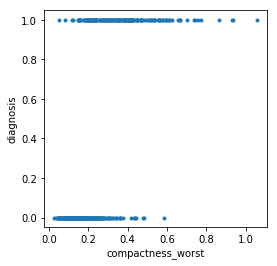

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 27], xy_train[:, 1], '.')
plt.xlabel('compactness_worst')
plt.ylabel('diagnosis')
plt.show()

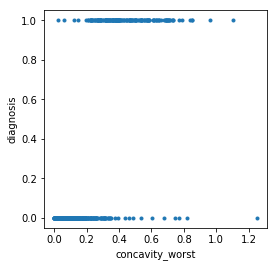

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 28], xy_train[:, 1], '.')
plt.xlabel('concavity_worst')
plt.ylabel('diagnosis')
plt.show()

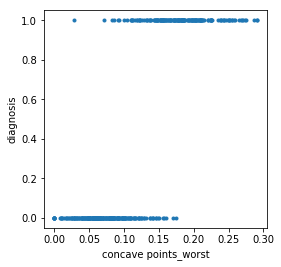

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 29], xy_train[:, 1], '.')
plt.xlabel('concave points_worst')
plt.ylabel('diagnosis')
plt.show()

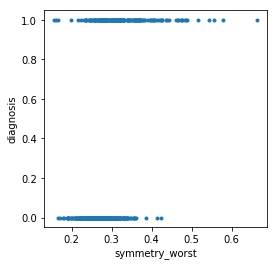

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 30], xy_train[:, 1], '.')
plt.xlabel('symmetry_worst')
plt.ylabel('diagnosis')
plt.show()

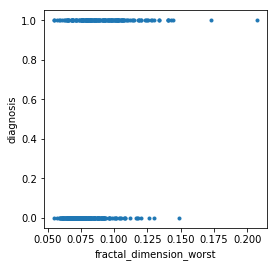

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 31], xy_train[:, 1], '.')
plt.xlabel('fractal_dimension_worst')
plt.ylabel('diagnosis')
plt.show()

## Splitting the set into corresponding X(inputs) and Y(outputs)

In [0]:
#2-31 columns from the xy_train set
x_train = xy_train[:, 2:32]
print('X-train')
print(x_train[0:2,])

#output feature to train
y_train = xy_train[:, 1]
print('Y_train')
print(y_train[0:2])


#x_test contains columns from 2-31 of the 400+ rows
x_test = xy_test[:, 2:32]
print('x_test')
print(x_test[0:2])
y_test = xy_test[:, 1 ]
print('y_test')
print(y_test[0:2])

X-train
[[ 1.02657917 -2.08243377  1.19736196  0.91859792  1.54355776  3.11361256
   2.50997064  2.38617079  2.06553223  2.2064119   2.43056639 -0.54086013
   2.75462401  2.55067808 -0.19942657  1.18994085  0.62003956  0.58837688
   0.9795074   0.80432755  1.77143584 -1.30808125  2.18783674  1.8916452
   1.23960047  2.42838506  2.00854658  2.15688186  2.44600065  1.81229287]
 [ 1.74850201 -0.28733171  1.60760452  1.82939937 -0.87675904 -0.51405654
  -0.08830407  0.45880849 -0.07036679 -0.84681266  0.44166134 -0.85963674
   0.21046733  0.72995108 -0.58243417 -0.68650166 -0.43335926  0.20506391
  -0.8039003  -0.11798902  1.69276957 -0.31334577  1.43687377  1.7834848
  -0.40159072 -0.45698046 -0.19608489  0.98475209 -0.31937386  0.23870437]]
Y_train
[1. 1.]
x_test
[[ 1.00419397  0.50212454  1.26235088  0.89898065  1.87432001  2.7489494
   2.7390868   1.70221147  0.98878577  1.15911709 -0.06503161 -0.78375526
   0.07568731 -0.01766716  0.04851701  0.57106966  0.85752656 -0.24342779
  -0.58

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 30)
(169, 30)
(400,)
(169,)


## **Data normalization**
Decided to normalize the data, because after building the model without normalizing the data, mae was equal with nan, increasing the batch size did not solve the problem.
Normalizing will create a more robust data and the values with large magnitudes will not overwhelm small values.

Normalization used:
y = (x - mean) / standard_deviation
where 
standard_deviation = sqrt( sum( (x - mean)^2 ) / count(x))

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

###BoxPlot after data was normalized

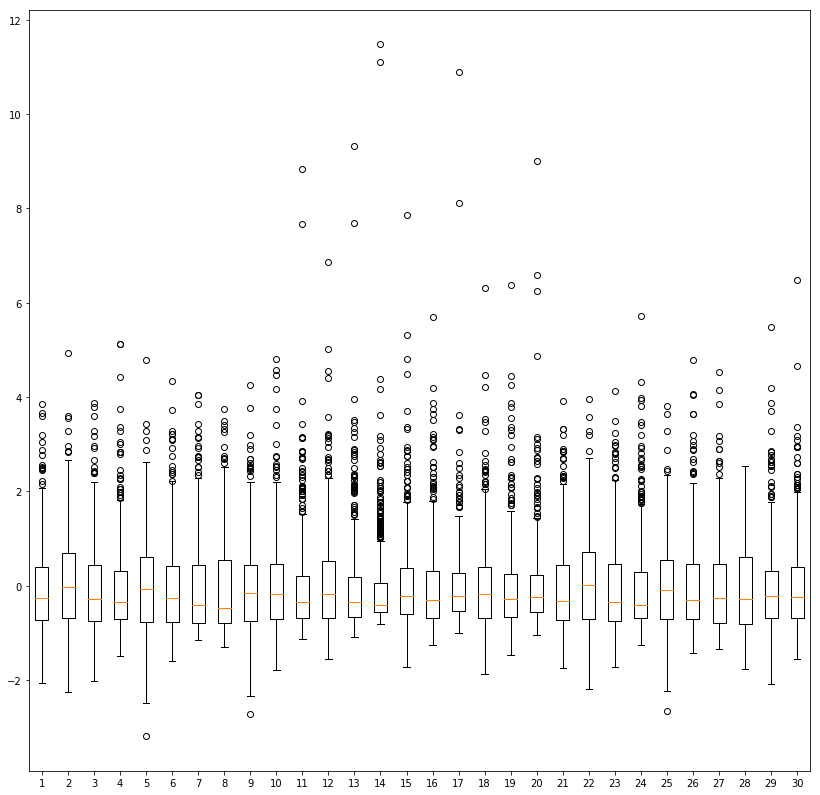

In [0]:
# Create a figure instance
fig = plt.figure(1, figsize=(14, 14))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(xy[:, 2:32])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

# **Build the model**




In [0]:

# import regularizer
#from keras.regularizers import l1
# instantiate regularizer
#reg = l1(0.001)

model = Sequential() #linear stack of layers
#model.add(Dense(1, input_dim = 30,  activation='linear', activity_regularizer=l1(0.001)))
model.add(Dense(1, input_dim = 30,  activation='linear'))
print(model.summary())

#31 parameters-- 1 for the noise data
#all parameters(input features) are being trained

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


Optimizer used: Stochastic gradient descent(SGD) , works well for shallow networks

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Statistics:

epoch = 128   and batch_size = 32
=> accuracy = 0.1475

In [0]:

history = model.fit(x_train, y_train, epochs= 128, verbose = 2, batch_size = 32 , validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 400 samples, validate on 169 samples
Epoch 1/128
 - 3s - loss: 9.7004 - acc: 0.2100 - val_loss: 4.5987 - val_acc: 0.3195
Epoch 2/128
 - 0s - loss: 2.2993 - acc: 0.2750 - val_loss: 0.3803 - val_acc: 0.3314
Epoch 3/128
 - 0s - loss: 0.8178 - acc: 0.2975 - val_loss: 0.3693 - val_acc: 0.3195
Epoch 4/128
 - 0s - loss: 0.5462 - acc: 0.2475 - val_loss: 0.3377 - val_acc: 0.3136
Epoch 5/128
 - 0s - loss: 0.4505 - acc: 0.2325 - val_loss: 0.3285 - val_acc: 0.2663
Epoch 6/128
 - 0s - loss: 0.4010 - acc: 0.2075 - val_loss: 0.2569 - val_acc: 0.2663
Epoch 7/128
 - 0s - loss: 0.3441 - acc: 0.2150 - val_loss: 0.1687 - val_acc: 0.2485
Epoch 8/128
 - 0s - loss: 0.3359 - acc: 0.2075 - val_loss: 0.1590 - val_acc: 0.2426
Epoch 9/128
 - 0s - loss: 0.3302 - acc: 0.2000 - val_loss: 0.1546 - val_acc: 0.2426
Epoch 10/128
 - 0s - loss: 0.2247 - acc: 0.1975 - val_loss: 0.0567 - val_acc: 0.2663
Epoch 11/128
 - 0s - loss: 0.1862 - acc: 0.2075 - val_loss: 0.067

Real results:
[1. 0. 0. 0. 0. 0.]
[[ 4.453148 ]
 [-1.7841712]
 [-1.5555737]
 [-1.6724721]
 [-2.6540549]
 [-2.1220996]]


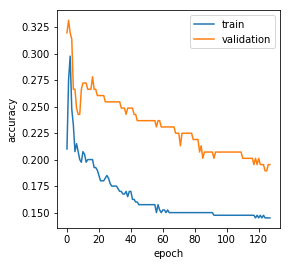

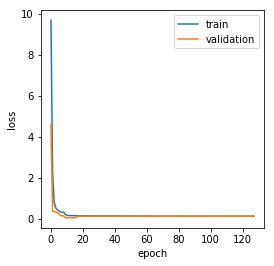

In [0]:
print("Real results:")
print(y_test[0:6])
prediction = model.predict(x_test)
print(prediction[0:6])

plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

###Incresing the number of epochs to and batch_size

### My statistics: 

Increasing epochs size to 250, batch size to its default value = 32
=> Accuracy = 0.9725.

Thoughts: Noticed that increasing the batch size, accuracy also was increased to almost 0.04.

acc is the accuracy of a batch of training data and val_acc is the accuracy of a batch of testing data

In [0]:
# Verbose = 2 to check the accuracy and val of accuracy in order to see if overfitting happens 
history = model.fit(x_train, y_train, epochs= 250, verbose = 2, batch_size = 64 , validation_data = (x_test, y_test))

Train on 400 samples, validate on 169 samples
Epoch 1/250
 - 0s - loss: 0.1395 - acc: 0.1425 - val_loss: 0.1389 - val_acc: 0.1953
Epoch 2/250
 - 0s - loss: 0.1394 - acc: 0.1425 - val_loss: 0.1386 - val_acc: 0.1953
Epoch 3/250
 - 0s - loss: 0.1395 - acc: 0.1425 - val_loss: 0.1381 - val_acc: 0.1893
Epoch 4/250
 - 0s - loss: 0.1394 - acc: 0.1425 - val_loss: 0.1382 - val_acc: 0.1893
Epoch 5/250
 - 0s - loss: 0.1393 - acc: 0.1425 - val_loss: 0.1370 - val_acc: 0.1893
Epoch 6/250
 - 0s - loss: 0.1393 - acc: 0.1425 - val_loss: 0.1364 - val_acc: 0.1893
Epoch 7/250
 - 0s - loss: 0.1394 - acc: 0.1450 - val_loss: 0.1365 - val_acc: 0.1893
Epoch 8/250
 - 0s - loss: 0.1393 - acc: 0.1425 - val_loss: 0.1366 - val_acc: 0.1893
Epoch 9/250
 - 0s - loss: 0.1393 - acc: 0.1425 - val_loss: 0.1362 - val_acc: 0.1893
Epoch 10/250
 - 0s - loss: 0.1393 - acc: 0.1425 - val_loss: 0.1365 - val_acc: 0.1893
Epoch 11/250
 - 0s - loss: 0.1392 - acc: 0.1425 - val_loss: 0.1365 - val_acc: 0.1893
Epoch 12/250
 - 0s - loss: 0

# **Evaluating Predictions**

In [0]:
print(y_test[0:6])

[1. 0. 0. 0. 0. 0.]



Predicted Values seemed to be quite close to the real values.

In [0]:
prediction = model.predict(x_test)
print(prediction[0:6])

[[ 4.8173122]
 [-1.9421773]
 [-1.7995822]
 [-1.8490376]
 [-2.9870486]
 [-2.464091 ]]


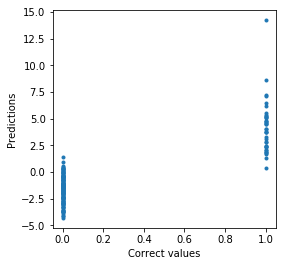

In [0]:
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

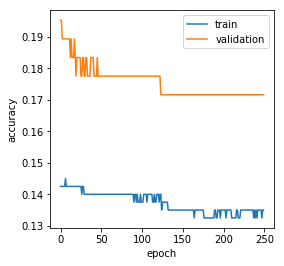

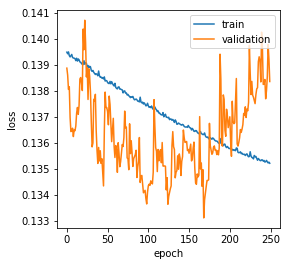

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Building a bigger linear model

Predicitions did not improve by adding more layers to our model

In [0]:

# example of l1 norm on activity from a dense layer

from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim = 30, activation='linear'))
#model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='linear'))
#model.add(Dropout(0.2)) 
model.add(Dense(1, activation='linear'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 0s - loss: 1.8577 - acc: 0.1700 - val_loss: 0.3662 - val_acc: 0.1479
Epoch 2/256
 - 0s - loss: 0.4083 - acc: 0.1425 - val_loss: 0.3415 - val_acc: 0.1183
Epoch 3/256
 - 0s - loss: 0.4597 - acc: 0.1150 - val_loss: 0.5882 - val_acc: 0.1124
Epoch 4/256
 - 0s - loss: 0.2160 - acc: 0.1050 - val_loss: 0.6067 - val_acc: 0.1834
Epoch 5/256
 - 0s

##Using a sigmoid activation in a model with one layer

In [0]:
 model = Sequential()
#model.add(Dense(16, input_dim = 30, activation='sigmoid'))
model.add(Dense(1, input_dim = 30, activation='sigmoid'))
#model.add(Dense(1, activation='linear'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 128, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/128
 - 0s - loss: 1.0991 - acc: 0.2475 - val_loss: 0.7471 - val_acc: 0.5503
Epoch 2/128
 - 0s - loss: 0.7593 - acc: 0.5275 - val_loss: 0.5655 - val_acc: 0.7515
Epoch 3/128
 - 0s - loss: 0.5852 - acc: 0.7150 - val_loss: 0.4666 - val_acc: 0.8462
Epoch 4/128
 - 0s - loss: 0.4854 - acc: 0.7875 - val_loss: 0.4059 - val_acc: 0.8698
Epoch 5/128
 - 0s - loss: 0.4213 - acc: 0.8400 - val_loss: 0.3638 - val_acc: 0.8757
Epoch 6/128
 - 0s - loss: 0.3761 - acc: 0.8675 - val_loss: 0.3330 - val_acc: 0.8817
Epoch 7/128
 - 0s - loss: 0.3424 - acc: 0.8900 - val_loss: 0.3094 - val_acc: 0.8994
Epoch 8/128
 - 0s - loss: 0.3163 - 

####Evaluating Predictions for the model with a sigmoid activation 

In [0]:
print(y_test[0:6])
prediction = model.predict(x_test)
print(prediction[0:6])

[1. 0. 0. 0. 0. 0.]
[[0.99970824]
 [0.0085254 ]
 [0.01974723]
 [0.02590275]
 [0.00185731]
 [0.01726916]]


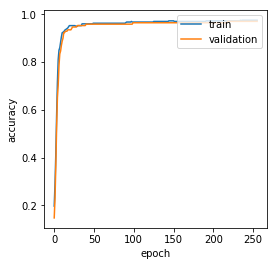

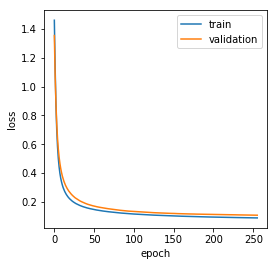

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

###Increasing the epochs and batch-size to check for improvement in prediction
Changing the activation of the network to sigmoid, logistic regression, using the same number of epochs as the previous network 256.
The loss function, binary_crossentropy, is specific to binary classification.

In [0]:
model = Sequential()
#model.add(Dense(16, input_dim = 30, activation='sigmoid'))
model.add(Dense(1, input_dim = 30, activation='sigmoid'))
#model.add(Dense(1, activation='linear'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size = 64, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 0s - loss: 0.4193 - acc: 0.8400 - val_loss: 0.4945 - val_acc: 0.7396
Epoch 2/256
 - 0s - loss: 0.3822 - acc: 0.8675 - val_loss: 0.4597 - val_acc: 0.7870
Epoch 3/256
 - 0s - loss: 0.3531 - acc: 0.8825 - val_loss: 0.4318 - val_acc: 0.8166
Epoch 4/256
 - 0s - loss: 0.3300 - acc: 0.9050 - val_loss: 0.4094 - val_acc: 0.8462
Epoch 5/256
 - 0s - loss: 0.3113 - acc: 0.9150 - val_loss: 0.3898 - val_acc: 0.8521
Epoch 6/256
 - 0s - loss: 0.2956 - acc: 0.9275 - val_loss: 0.3720 - val_acc: 0.8580
Epoch 7/256
 - 0s - loss: 0.2817 - acc: 0.9300 - val_loss: 0.3572 - val_acc: 0.8698
Epoch 8/256
 - 0s - loss: 0.2703 - 

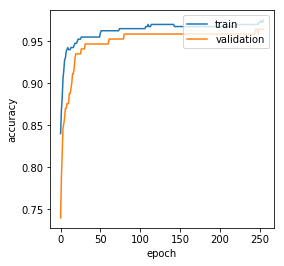

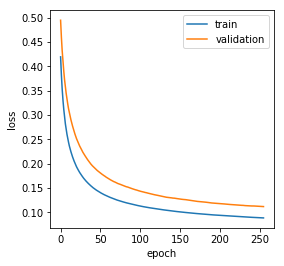

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

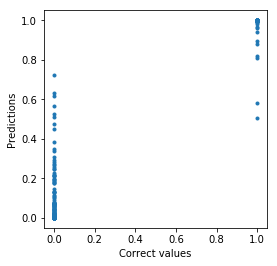

In [0]:
prediction = model.predict(x_test)
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

In [0]:
np.set_printoptions(precision = 3)
print ('True Validation Data:')
print(y_test[0:6])
print ('Prediction:')
prediction = model.predict(x_test)
print(prediction[0:6])

True Validation Data:
[1. 0. 0. 0. 0. 0.]
Prediction:
[[1.   ]
 [0.004]
 [0.012]
 [0.022]
 [0.002]
 [0.016]]


# Using a larger network

In [0]:

# example of l1 norm on activity from a dense layer

from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim = 30, activation='linear'))
model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='linear'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                992       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 0s - loss: 0.8796 - acc: 0.5400 - val_loss: 0.3418 - val_acc: 0.8757
Epoch

####Evaluating predictions

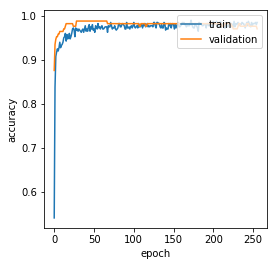

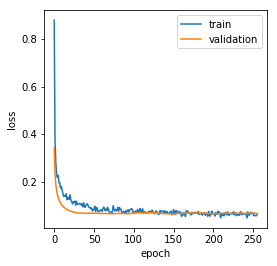

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim = 30, activation='linear'))
#model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='relu'))
#model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 0s - loss: 0.5897 - acc: 0.7650 - val_loss: 0.4905 - val_acc: 0.8639
Epoch 2/256
 - 0s - loss: 0.4734 - acc: 0.8675 - val_loss: 0.4210 - val_acc: 0.8994
Epoch 3/256
 - 0s - loss: 0.4027 - acc: 0.9000 - val_loss: 0.3697 - val_acc: 0.9172
Epoch 4/256
 - 0s - loss: 0.3524 - acc: 0.9150 - val_loss: 0.3299 - val_acc: 0.9172
Epoch 5/256
 - 0s

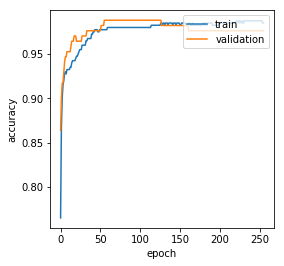

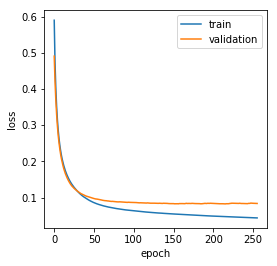

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim = 30, activation='relu'))
#model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='relu'))
#model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 500, verbose = 2, batch_size=64, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/500
 - 1s - loss: 0.7630 - acc: 0.4200 - val_loss: 0.7301 - val_acc: 0.4320
Epoch 2/500
 - 0s - loss: 0.6756 - acc: 0.5500 - val_loss: 0.6700 - val_acc: 0.5621
Epoch 3/500
 - 0s - loss: 0.6116 - acc: 0.6600 - val_loss: 0.6216 - val_acc: 0.6805
Epoch 4/500
 - 0s - loss: 0.5606 - acc: 0.7175 - val_loss: 0.5810 - val_acc: 0.7574
Epoch 5/500
 - 0s

In [0]:
np.set_printoptions(precision = 3)
print ('True Validation Data:')
print(y_test[0:6])
print ('Prediction:')
prediction = model.predict(x_test)
print(prediction[0:6])

True Validation Data:
[1. 0. 0. 0. 0. 0.]
Prediction:
[[1.   ]
 [0.   ]
 [0.   ]
 [0.001]
 [0.   ]
 [0.008]]


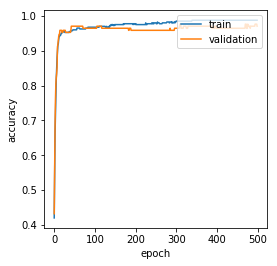

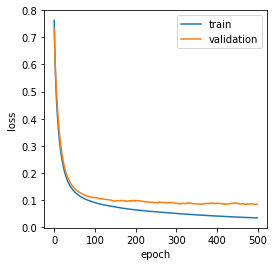

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim = 30, activation='linear'))
#model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='sigmoid'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 1s - loss: 0.7679 - acc: 0.4625 - val_loss: 0.8366 - val_acc: 0.2367
Epoch 2/256
 - 0s - loss: 0.6945 - acc: 0.5275 - val_loss: 0.7502 - val_acc: 0.3314
Epoch 3/256
 - 0s - loss: 0.6462 - acc: 0.5975 - val_

In [0]:
np.set_printoptions(precision = 3)
print ('True Validation Data:')
print(y_test[0:6])
print ('Prediction:')
prediction = model.predict(x_test )
print(prediction[0:6])

True Validation Data:
[1. 0. 0. 0. 0. 0.]
Prediction:
[[0.995]
 [0.01 ]
 [0.011]
 [0.013]
 [0.008]
 [0.012]]


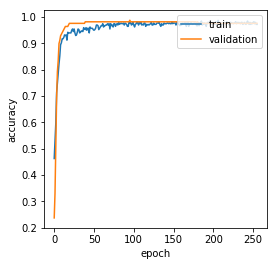

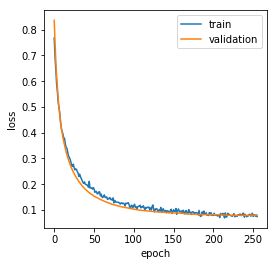

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Evaluating a function that predicts our model
Using a sigmoid model with 1 layer

In [0]:
 model = Sequential()
#model.add(Dense(16, input_dim = 30, activation='sigmoid'))
model.add(Dense(1, input_dim = 30, activation='sigmoid'))
#model.add(Dense(1, activation='linear'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 128, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/128
 - 1s - loss: 0.4123 - acc: 0.8475 - val_loss: 0.3782 - val_acc: 0.8817
Epoch 2/128
 - 0s - loss: 0.3562 - acc: 0.8750 - val_loss: 0.3337 - val_acc: 0.9231
Epoch 3/128
 - 0s - loss: 0.3169 - acc: 0.9000 - val_loss: 0.3009 - val_acc: 0.9231
Epoch 4/128
 - 0s - loss: 0.2877 - acc: 0.9150 - val_loss: 0.2754 - val_acc: 0.9349
Epoch 5/128
 - 0s - loss: 0.2650 - acc: 0.9225 - val_loss: 0.2563 - val_acc: 0.9467
Epoch 6/128
 - 0s - loss: 0.2476 - acc: 0.9350 - val_loss: 0.2410 - val_acc: 0.9467
Epoch 7/128
 - 0s - loss: 0.2336 - acc: 0.9400 - val_loss: 0.2278 - val_acc: 0.9467
Epoch 8/128
 - 0s - loss: 0.2217 - 

In [0]:
size = len(x_train[0])

In [0]:
wts_in_l0 = model.layers[0].get_weights()[0]
bias0 =  model.layers[0].get_weights()[1]

print(wts_in_l0.shape)
print('Weights')
print(wts_in_l0)
print('Bias value')
print(bias0)

(30, 1)
Weights
[[ 0.519]
 [ 0.583]
 [ 0.042]
 [ 0.724]
 [ 0.389]
 [-0.25 ]
 [ 0.599]
 [ 0.462]
 [-0.025]
 [-0.343]
 [ 0.497]
 [ 0.131]
 [ 0.485]
 [ 0.466]
 [-0.091]
 [ 0.096]
 [-0.098]
 [-0.19 ]
 [-0.04 ]
 [-0.433]
 [ 0.59 ]
 [ 0.48 ]
 [ 0.12 ]
 [ 0.225]
 [ 0.375]
 [ 0.398]
 [ 0.196]
 [ 0.869]
 [ 0.251]
 [ 0.18 ]]
Bias value
[0.069]


## 5- Effort to code a function that represents my model:

In [0]:
print('Test Data Row = 0:')
print(x_test[0], y_test[0])




#sigmoid function
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

print('Prediction from our function:')
pred_funct = x_test[0, 0] * (wts_in_l0[0]) + x_test[0, 1] * (wts_in_l0[1]) + x_test[0, 2] * (wts_in_l0[2]) + x_test[0, 3] * (wts_in_l0[3]) + x_test[0, 4] * (wts_in_l0[4]) + x_test[0, 5] * (wts_in_l0[5]) + x_test[0, 6] * (wts_in_l0[6]) + x_test[0, 7] * (wts_in_l0[7]) +x_test[0, 8] * (wts_in_l0[8]) + x_test[0, 9] * (wts_in_l0[9]) + x_test[0, 10] * (wts_in_l0[10]) + x_test[0, 11] * (wts_in_l0[11]) + x_test[0, 12] * (wts_in_l0[12]) + x_test[0, 13] * (wts_in_l0[13]) + x_test[0, 14] * (wts_in_l0[14]) + x_test[0, 15] * (wts_in_l0[15]) + x_test[0, 16] * (wts_in_l0[16]) + x_test[0, 17] * (wts_in_l0[17]) + x_test[0, 18] * (wts_in_l0[18]) + x_test[0, 19] * (wts_in_l0[19])  + x_test[0, 20] * (wts_in_l0[20]) + x_test[0, 21] * (wts_in_l0[21]) + x_test[0, 22] * (wts_in_l0[22]) + x_test[0, 23] * (wts_in_l0[23]) + x_test[0, 24] * (wts_in_l0[24]) + x_test[0, 25] * (wts_in_l0[25]) + x_test[0, 26] * (wts_in_l0[26]) + x_test[0, 27] * (wts_in_l0[27])  + x_test[0, 28] * (wts_in_l0[28]) + x_test[0, 29] * (wts_in_l0[29])  + (bias0)
print(sigmoid(pred_funct))
print('Validation Data 1:')
print(x_test[1], y_test[1])
print('Prediction from our function:')
pred_funct2 = x_test[1, 0] * (wts_in_l0[0]) + x_test[1, 1] * (wts_in_l0[1]) + x_test[1, 2] * (wts_in_l0[2]) + x_test[1, 3] * (wts_in_l0[3]) + x_test[1, 4] * (wts_in_l0[4]) + x_test[1, 5] * (wts_in_l0[5]) + x_test[1, 6] * (wts_in_l0[6]) + x_test[1, 7] * (wts_in_l0[7]) +x_test[1, 8] * (wts_in_l0[8]) + x_test[1, 9] * (wts_in_l0[9]) + x_test[1, 10] * (wts_in_l0[10]) + x_test[1, 11] * (wts_in_l0[11]) + x_test[1, 12] * (wts_in_l0[12]) + x_test[1, 13] * (wts_in_l0[13]) + x_test[1, 14] * (wts_in_l0[14]) + x_test[1, 15] * (wts_in_l0[15]) + x_test[1, 16] * (wts_in_l0[16]) + x_test[1, 17] * (wts_in_l0[17]) + x_test[1, 18] * (wts_in_l0[18]) + x_test[1, 19] * (wts_in_l0[19])  + x_test[1, 20] * (wts_in_l0[20]) + x_test[1, 21] * (wts_in_l0[21]) + x_test[1, 22] * (wts_in_l0[22]) + x_test[1, 23] * (wts_in_l0[23]) + x_test[1, 24] * (wts_in_l0[24]) + x_test[1, 25] * (wts_in_l0[25]) + x_test[1, 26] * (wts_in_l0[26]) + x_test[1, 27] * (wts_in_l0[27])  + x_test[1, 28] * (wts_in_l0[28]) + x_test[1, 29] * (wts_in_l0[29])  + (bias0)
print(sigmoid(pred_funct2))


np.set_printoptions(precision = 3)
print ('True Validation Data:')
print(y_test[0:3])
print ('Prediction from the model:')
prediction = model.predict(x_test )
print(prediction[0:2])

Test Data Row = 0:
[ 1.004  0.502  1.262  0.899  1.874  2.749  2.739  1.702  0.989  1.159
 -0.065 -0.784  0.076 -0.018  0.049  0.571  0.858 -0.243 -0.581  0.425
  0.848  0.402  1.169  0.664  2.312  1.983  2.906  1.138  0.42   1.86 ] 1.0
Prediction from our function:
[1.]
Validation Data 1:
[-0.669 -1.954 -0.698 -0.646 -0.591 -0.992 -0.83  -0.849 -0.813 -1.021
 -0.609 -0.281 -0.647 -0.536 -0.273 -0.741 -0.578 -0.969 -1.128 -0.699
 -0.564 -0.848 -0.634 -0.563  0.18  -0.632 -0.619 -0.746 -0.753 -0.625] 0.0
Prediction from our function:
[0.007]
True Validation Data:
[1. 0. 0.]
Prediction from the model:
[[1.   ]
 [0.007]]
